In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Add the stocks to the dictionary
stocks = {
    'asian_paint': 'ASIANPAINT.NS.csv',
    'bajaj_finserv': 'BAJAJFINSV.NS.csv',
    'dlf': 'DLF.NS.csv',
}

In [3]:
# Fetching the stocks
data = input('Enter stock name: ')
stock = stocks.get(data)
print(stock)

Enter stock name: asian_paint
ASIANPAINT.NS.csv


In [4]:
# CSV file reading
df = pd.read_csv(stock)

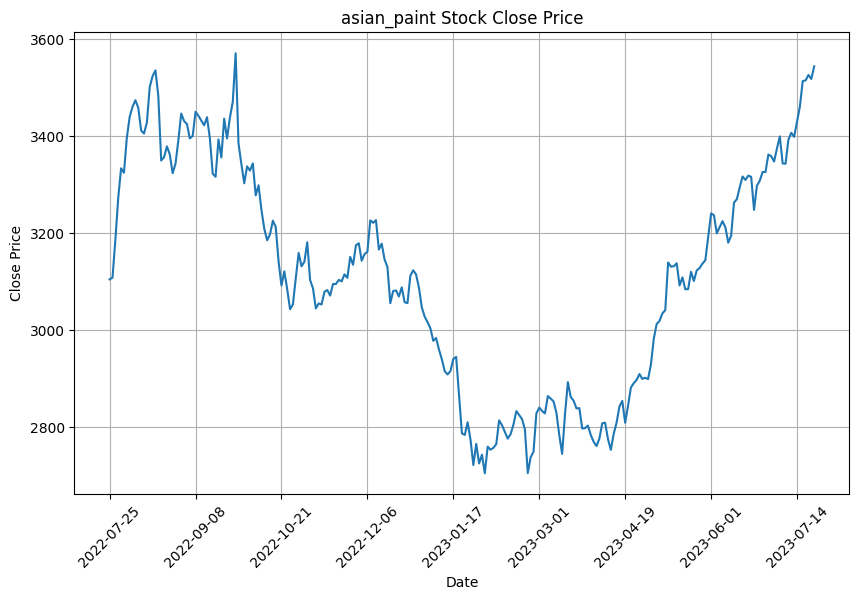

In [5]:
# Plot the 'Close' column
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'{data} Stock Close Price')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=10)) 
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [6]:
# Drop rows with null values and make sure to rename the variable to 'new_data'
new_data = df.dropna(axis=0, how='any').copy()

# Convert the 'Date' column to pandas datetime format
new_data['Date'] = pd.to_datetime(new_data['Date'])

# Find the minimum date to use as a reference for conversion
min_date = new_data['Date'].min()

# Convert the 'Date' column to the number of days since the reference date
new_data['Date'] = (new_data['Date'] - min_date).dt.days


In [7]:
# Add a new column 'previous_close' and fill it with the previous day's 'Close' value
new_data['previous_close'] = new_data['Close'].shift(fill_value=0)
# Drop first row 
# by selecting all rows from first row onwards
new_data = new_data.iloc[1: , :]
new_data

,Date,Open,High,Low,Close,Adj Close,Volume,previous_close
1,1,3096.000000,3149.800049,3053.000000,3108.500000,3083.486572,2876310,3104.949951
2,2,3118.949951,3193.000000,3096.000000,3186.050049,3160.412598,1976407,3108.500000
3,3,3198.000000,3280.000000,3182.000000,3272.399902,3246.067627,1332572,3186.050049
4,4,3285.399902,3354.350098,3275.000000,3333.750000,3306.924072,1836550,3272.399902
5,7,3340.050049,3355.000000,3314.500000,3324.550049,3297.798096,1076122,3333.750000
...,...,...,...,...,...,...,...,...
242,358,3460.000000,3523.000000,3455.600098,3513.449951,3513.449951,962485,3460.399902
243,359,3520.000000,3530.000000,3482.500000,3514.649902,3514.649902,620289,3513.449951
244,360,3510.050049,3535.000000,3494.949951,3526.000000,3526.000000,589848,3514.649902
245,361,3535.949951,3537.949951,3505.000000,3517.699951,3517.699951,857975,3526.000000


In [8]:
# Extract the input features (X) and the target variable (y)
X = new_data[['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume', 'previous_close']]
y = new_data['Close']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=4)

In [10]:
# Create the Random Forest Regressor model
model = RandomForestRegressor()

In [11]:
# Fit the model to the training data
model.fit(X_train, y_train);

Enter the prediction date (YYYY-MM-DD): 2023-07-25


/home/jeganm/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Predicted Close Price for 2023-07-25: 3536.34
Accuracy: 99.63%
Buy


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


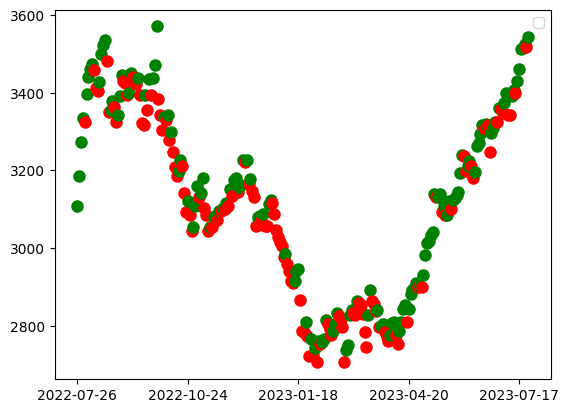

In [12]:
# User input for prediction date
input_date_str = input("Enter the prediction date (YYYY-MM-DD): ")

try:
    input_date = pd.to_datetime(input_date_str)
except ValueError:
    print("Invalid date format. Please enter the date in the format 'YYYY-MM-DD'.")
    exit()

input_date_days = (input_date - min_date).days

# Get the row with the previous day's data
previous_day_row = new_data[new_data['Date'] == (input_date_days - 1)]

if previous_day_row.empty:
    print("There is no previous day's data available for the input date.")
    exit()

# Extract the values for the other features (Open, High, Low, Adj Close, Volume, previous_close) from the previous day's data
input_features = [input_date_days,  # Date
                  previous_day_row['Open'].values[0],
                  previous_day_row['High'].values[0],
                  previous_day_row['Low'].values[0],
                  previous_day_row['Adj Close'].values[0],
                  previous_day_row['Volume'].values[0],
                  previous_day_row['previous_close'].values[0]
                 ]

# Make prediction for the user input date
predicted_close = model.predict([input_features])[0]
print(f"Predicted Close Price for {input_date_str}: {predicted_close:.2f}")

accuracy = model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Decision based on predicted_close and Open price
if predicted_close > previous_day_row['Open'].values[0]:
    print('Buy')
else:
    print('Sell')

# Plot the stock graph with different colors for price increase and decrease
for i in range(1, len(df)):
    if df['Close'][i] > df['Close'][i - 1]:
        plt.plot(df['Date'][i], df['Close'][i], 'go', markersize=8)
    else:
        plt.plot(df['Date'][i], df['Close'][i], 'ro', markersize=8)
        
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=5)) 
plt.legend()
plt.show()

In [13]:
# User input for prediction date
input_date_str = input("Enter the prediction date (YYYY-MM-DD): ")

try:
    input_date = pd.to_datetime(input_date_str)
except ValueError:
    print("Invalid date format. Please enter the date in the format 'YYYY-MM-DD'.")
    exit()

input_date_days = (input_date - min_date).days

# Get the row with the previous day's data
previous_day_row = new_data[new_data['Date'] == (input_date_days - 1)]

if previous_day_row.empty:
    print("There is no previous day's data available for the input date.")
    exit()

# User inputs for the features
Open = float(input("Enter the Open price: "))
High = float(input("Enter the High: "))
Low = float(input("Enter the Low: "))
Adj_close = float(input("Enter the Adj_close: "))
Volume = int(input("Enter the Volume (without commas): "))  # Corrected input for Volume
previous_close = float(input("Enter the previous day close: "))  # Fixed typo

# Create a DataFrame with the user inputs
input_features = pd.DataFrame({'Date': [input_date_days],
                               'Open': [Open],
                               'High': [High],
                               'Low': [Low],
                               'Adj Close': [Adj_close],
                               'Volume': [Volume],
                               'previous_close': [previous_close]
                              })

# Make prediction for the user input date
predicted_close = model.predict(input_features)[0]
print(f"Predicted Close Price for {input_date_str}: {predicted_close:.2f}")

# Decision based on predicted_close and Open price
if predicted_close > Open:
    print('Buy')
else:
    print('Sell')
    
accuracy = model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))



Enter the prediction date (YYYY-MM-DD): 2023-07-25
Enter the Open price: 3506.00
Enter the High: 3568.00
Enter the Low: 3498.50
Enter the Adj_close: 3543.70
Enter the Volume (without commas): 680128
Enter the previous day close: 3543.70
Predicted Close Price for 2023-07-25: 3534.28
Buy
Accuracy: 99.63%


In [15]:
#3506.00	3568.00	3498.50	3543.70	3543.70	680128